### Create Regression Dataset with class implementation

<b>Note:</b> you need to run data creating script

#### Start with our own class

In [1]:
import torch
import torchvision

from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader, random_split

In [2]:
import os
import json

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

In [3]:
class DatasetReg(Dataset):
    def __init__(self, path, transform=None):
        self.path = path
        self.transform = transform

        self.list_name_file = os.listdir(path)
        if 'coords.json' in self.list_name_file:
            self.list_name_file.remove('coords.json')

        self.len_dataset = len(self.list_name_file)

        with open(os.path.join(self.path, 'coords.json'), 'r') as f:
            self.dict_coords = json.load(f)
        
    def __len__(self):
        return self.len_dataset

    def __getitem__(self, index):
        name_file = self.list_name_file[index]
        path_img = os.path.join(self.path, name_file)

        img = np.array(Image.open(path_img))
        coords = np.array(self.dict_coords[name_file])

        if self.transform:
            img = self.transform(img)

        return img, coords

In [4]:
dataset = DatasetReg(os.path.join(os.getcwd(), 'dataset'))

Center coords - [27 31]


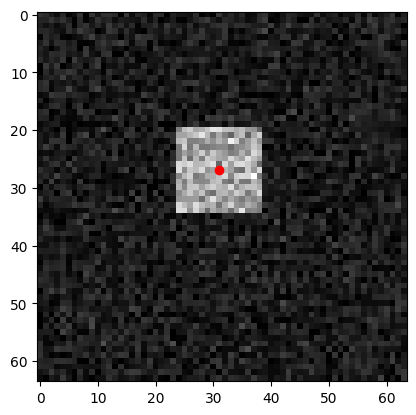

In [5]:
img, coords = dataset[98850]
print(f'Center coords - {coords}')
plt.scatter(coords[1], coords[0], marker='o', color='red')
plt.imshow(img, cmap='grey')
plt.show()

In [6]:
# do train-val split
train_data, val_data, test_data = random_split(dataset, [0.7, 0.1, 0.2])

In [7]:
# do batches
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)